In [1]:
# Imports
#%matplotlib qt
%matplotlib inline

import matplotlib.pyplot as plt
import mne
import os
import numpy as np
from scipy.stats import pearsonr
from matplotlib import cm
import scipy
import sys

from fooof import FOOOF
from fooof import FOOOFGroup

In [2]:
fg = FOOOFGroup()

In [55]:
# Set up paths

# This base path will need updating
base_path = 'D:\\abc\\Documents\\Research\\PBA_Data'

# These should stay the same
#subj_dat_fname = '._3001_resampled.set'
subj_dat_fname = '3005_resampled.set'

In [56]:
# Read in subject listed above

ev_dict = {'Rest_Start': 1001., 'Rest_End': 1002, 'Exp_Block_Start':1003, 'Exp_Block_End':1004 }
# event dictionary:
# "Rest_Start" and "Rest_End": The Rest Block
# "Exp_Block_Start" and "Exp_Block_End": The Experiment Block
full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict, preload=True)

Events like the following will be dropped entirely: ['RETURN released', 'RETURN pressed', 'Catch_exp', 'Flash_exp', 'Instructions_Start'], 20 in total
5502/6662 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
9 events will be dropped because they occur on the same time sample as another event. `mne.io.Raw` objects store events on an event channel, which cannot represent two events on the same sample. You can extract the original event structure using `mne.io.eeglab.read_events_eeglab`. Then, you can e.g. subset the extracted events for constructing epochs.
Reading D:\abc\Documents\Research\PBA_Data\3005_resampled.fdt
Reading 0 ... 1947250  =      0.000 ...  3894.500 secs...


<ipython-input-56-54addedf9570>:7: RuntimeWarning: Events like the following will be dropped entirely: ['RETURN released', 'RETURN pressed', 'Catch_exp', 'Flash_exp', 'Instructions_Start'], 20 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict, preload=True)
<ipython-input-56-54addedf9570>:7: RuntimeWarning: 5502/6662 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict, preload=True)
<ipython-input-56-54addedf9570>:7: RuntimeWarning: 9 events will be dropped because they occur on the same time sample as another event. `mne.io.Raw` objects store events on an event channel, which cannot represent two events on the same sample. You can extract the original event structure using `mne.io.eeglab.read_events_eeglab`. Then, you can e.g. subset the extracted events for constructing epochs.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict, preload=T

In [57]:
eeg_dat.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : ndarray | 1970-01-01 00:00:00 GMT
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplo

In [58]:
eeg_dat.set_eeg_reference()
# set EEG average reference

The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<ipython-input-58-be3e7d7f3762>:1: DeprecationWarning: The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
  eeg_dat.set_eeg_reference()


<RawEEGLAB  |  3005_resampled.fdt, n_channels x n_times : 65 x 1947251 (3894.5 sec), ~965.8 MB, data loaded>

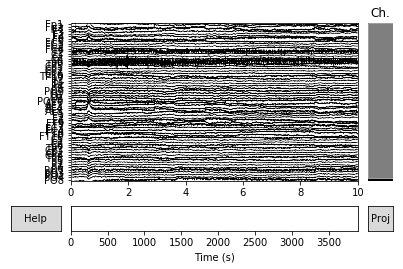

In [59]:
eeg_dat.plot(n_channels=64);

In [60]:
events = mne.find_events(eeg_dat)
event_id = {'Rest_Start': 1001, 'Exp_Block_Start':1003}

epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id)

1144 events found
Events id: [   1    3    5   11   12   13   14   21   22   23   24   31   32   33
   34 1001 1002 1003 1004]
4 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


Loading data for 4 events and 351 original time points ...
0 bad epochs dropped
Loading data for 4 events and 351 original time points ...


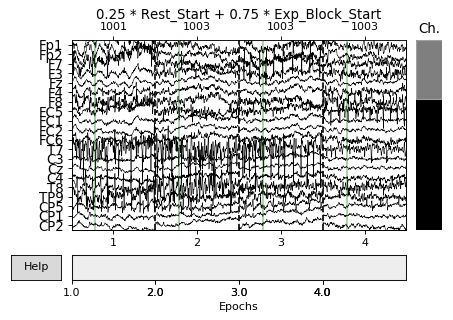

In [61]:
epochs.plot();

# Marking bad channels
### Based on visualization.


In [36]:
eeg_dat.info['bads'] = ['TP9']

In [37]:
print('Bad channels: ', eeg_dat.info['bads'])

Bad channels:  ['TP9']


1144 events found
Events id: [   1    2    3   11   12   13   14   21   22   23   24   31   32   33
   34 1001 1002 1003 1004]
Found %s events.

event 1 missing from event_id will be ignored
event 2 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 11 missing from event_id will be ignored
event 12 missing from event_id will be ignored
event 13 missing from event_id will be ignored
event 14 missing from event_id will be ignored
event 21 missing from event_id will be ignored
event 22 missing from event_id will be ignored
event 23 missing from event_id will be ignored
event 24 missing from event_id will be ignored
event 31 missing from event_id will be ignored
event 32 missing from event_id will be ignored
event 33 missing from event_id will be ignored
event 34 missing from event_id will be ignored
event 1002 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 2 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 11 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 12 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 13 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 14 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12: RuntimeWarning: event 21 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-38-4ae92e26c08b>:12:

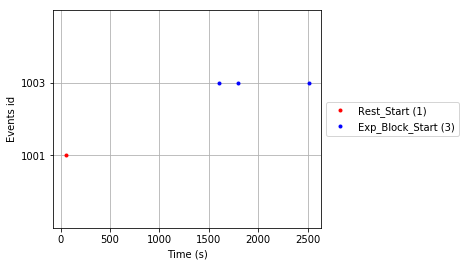

In [38]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Rest_Start': 1001, 'Exp_Block_Start':1003}
color = {1001:'red', 1003:'blue'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id);

# Marking bad moments
### Identifying bad moments based on visualization

In [39]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 115,
                    baseline = None, preload=True)

4 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 4 events and 55001 original time points ...
0 bad epochs dropped


In [40]:
chs = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(chs)

<Epochs  |  n_events : 4 (all good), tmin : 5.0 (s), tmax : 115.0 (s), baseline : None, ~109.3 MB, data loaded,
 'Exp_Block_Start': 3, 'Rest_Start': 1>

In [41]:
epochs.drop_bad()

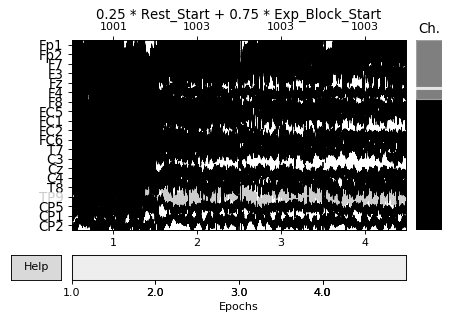

In [42]:
epochs.plot();

In [43]:
epochs._data.shape

(4, 65, 55001)

In [44]:
# Calculate PSD
psd, freqs = mne.time_frequency.psd_welch(epochs, fmin=1., fmax=50., n_fft=2000, n_overlap=250, n_per_seg=500)


Effective window size : 4.000 (s)


In [45]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

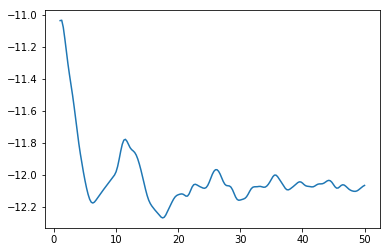

In [47]:
plt.plot(freqs, np.log10(psd[3, 30, :]))

# FOOOFing Data

In [48]:
fooof_psd = np.squeeze(psd[3,:,:])

In [49]:
fooof_psd.shape

(63, 197)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 32 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                         -11.6653, 1.0537                                         
                                                                                                  
                                       5 peaks were found:                                        
          

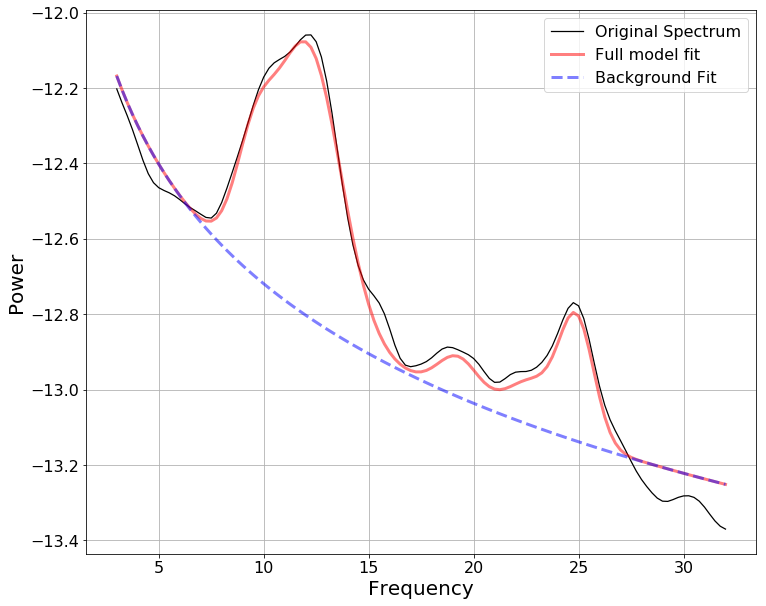

In [54]:
## Initialzing FOOOF model
fm = FOOOF(peak_width_limits=[1, 6], min_peak_amplitude=0.075, max_n_peaks=6, peak_threshold=1)

# Setting frequency range
freq_range = [3, 32]

fm.report(freqs, fooof_psd[ , :], freq_range)

In [30]:
# Run FOOOF across a group of PSDs
fg = FOOOFGroup(verbose=False)
fg.fit(freqs, fooof_psd, freq_range)

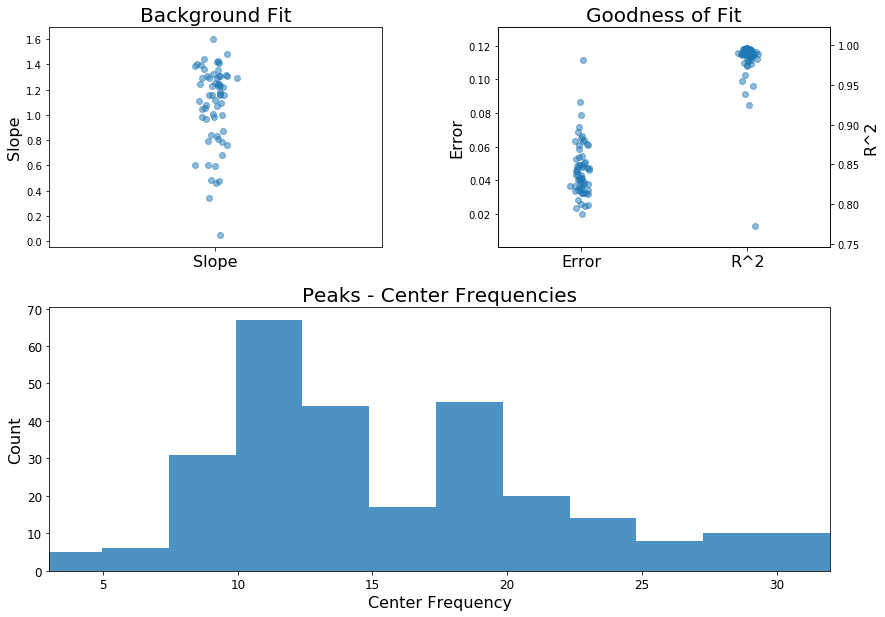

In [31]:
fg.plot()

In [85]:
n_channels, n_freq = fooof_psds.shape

In [87]:
fooof_results = np.zeros(shape = [n_channels,3])

In [ ]:
for i, ch_dat in enumerate(fg.group_results):
    fooof_results[i,:] = get_band_osc(ch_dat.oscillations_params, [8, 12])

In [ ]:
cfs = fooof_results[:, 0]
amps = fooof_results[:, 1]
bws = fooof_results[:,2]

In [ ]:
cfs = np.nan_to_num(cfs)
amps = np.nan_to_num(amps)
bws = np.nan_to_num(bws)

In [ ]:
# Define our oscillation bands
bands = [['Theta', [4, 8]], ['Alpha', [8, 12]]]

In [ ]:
# DESIRED OUTPUT:
#  1d array, len of n_channels with osc_band freq for each channel
#  Note: deal with the band in channel: try out different markers for none (0, nan, etc.)

# Mapping

In [ ]:
montage = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(montage)

In [ ]:
mne.viz.plot_topomap(cfs, epochs.info, cmap=cm.viridis, contours=0);

In [ ]:
mne.viz.plot_topomap(amps, epochs.info, cmap=cm.viridis, contours=0);

In [ ]:
mne.viz.plot_topomap(bws, epochs.info, cmap=cm.viridis, contours=0);